# PyNPEFA

PyNPEFA is a Python implementation of Integrated Prediction Error Filter Analysis (INPEFA) to show trend discontinuities in the data. This work is based on my BSc final project.

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import lasio
import numpy as np
from PyNPEFA import PyNPEFA

Read LAS file by using lasio Python package.

In [11]:
y = lasio.read('D:\Erich\Random Project\Well_Data\SEMBAKUNG-5_ARCIND\Log Digital\WCL0001834.LAS').df().GR.dropna()
x = np.array(y.index.tolist())

Apply PyNPEFA on the data.

     pcost       dcost       gap    pres   dres
 0: -5.4835e+03 -2.0659e+03  3e+06  2e+03  4e-16
 1: -2.2491e+03 -1.1381e+03  1e+06  6e+02  2e-15
 2: -5.6865e+02 -7.9514e+02  3e+05  1e+02  4e-15
 3: -1.6241e+01 -7.6526e+02  8e+03  3e+00  2e-15
 4: -3.5271e+00 -6.2360e+02  7e+02  2e-02  2e-15
 5: -5.8419e+00 -8.1397e+01  8e+01  3e-03  8e-16
 6: -1.7160e+01 -2.9617e+01  1e+01  3e-04  2e-16
 7: -2.1549e+01 -2.7169e+01  6e+00  7e-05  3e-16
 8: -2.3749e+01 -2.4443e+01  7e-01  8e-06  3e-16
 9: -2.4061e+01 -2.4156e+01  9e-02  9e-07  3e-16
10: -2.4106e+01 -2.4115e+01  9e-03  6e-08  2e-16
11: -2.4110e+01 -2.4111e+01  6e-04  3e-09  4e-16
12: -2.4110e+01 -2.4110e+01  1e-05  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.4703e+03 -7.8739e+03  3e+06  5e+02  5e-16
 1: -2.2510e+03 -7.5260e+03  1e+06  2e+02  2e-15
 2: -5.7724e+02 -7.4353e+03  3e+05  3e+01  2e-15
 3: -3.4048e+01 -7.2174e+03  9e+03  3e-01  2e-15
 4: -4.8274e+01 -1.4835e+03  1e+03  4e-02  1e-1

C:\Users\edael\Anaconda3\lib\site-packages\spectrum\burg.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  E[m+1] = (1 - ref[m].conj().transpose()*ref[m]) * E[m]


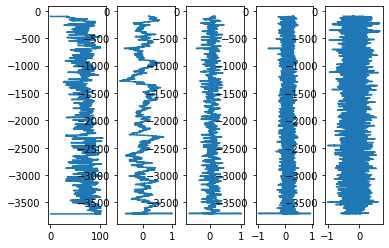

In [12]:
inpefa_log = PyNPEFA(y,x)

In [13]:
inpefa_log

{'OG': <7221x1 matrix, tc='d'>,
 '1': array([ 0.21364162,  0.21600787,  0.21069961, ..., -0.00582243,
         0.00483269,  0.02873502]),
 '2': array([ 0.17744135,  0.17076908,  0.16027924, ..., -0.00780056,
         0.00230132,  0.02920247]),
 '3': array([ 0.28195604,  0.30265791,  0.3246568 , ..., -0.01155527,
         0.00387828,  0.03106635]),
 '4': array([-0.50799302, -0.49037261, -0.36094892, ...,  0.02233578,
         0.00843136,  0.01894851])}

In [14]:
plt.show()